In [1]:
import os,sys
from glob import glob
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image


img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
clean_dir = os.path.join(img_dir, "real_hsqc_clean")
noisy_dir = os.path.join(img_dir, "real_hsqc_noisy")
imgs_resized=[]
imgs_orig_size=[]
all_img_paths = (glob(noisy_dir+"/*"))

save_dir_resize = f'/root/autoencoder_denoiser/dataset/resized_real_imgs/'
save_dir_orig_size = f'/root/autoencoder_denoiser/dataset/orig_size_real_imgs/'
os.makedirs(save_dir_resize, exist_ok=True)
os.makedirs(save_dir_orig_size, exist_ok=True)

last_compound_name = ''
for img_path in tqdm(all_img_paths):
    noise_level = img_path.split('/')[-1].split('_')[-1]
    compound_name = img_path.split('/')[-1].split('_')[0]
   

    '''ground truth'''
    path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_noisy","_original")
    path = path[:-5] + '1.png'
    if path[-6].isdigit():
        # print(ground_path)
        path = path[:-6]+path[-5:]
    # print(gound_path)
    img = Image.open(path)
    img = np.array(img)
    plus_groud = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
    minus_groud = 1-img[:,:, 2]/255
    ground_truth = (plus_groud - minus_groud).astype("float32")
    img_truth = cv2.resize(ground_truth.astype("float32"), (120, 180))
   
    
    '''noise'''
    img = Image.open(img_path)
    img = np.array(img)
    plus = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
    minus = 1-img[:,:, 2]/255
    # print(plus.shape)
    noise_input = (plus-minus).astype('float32')
    resized_input = cv2.resize(noise_input.astype("float32"), (120, 180))
    # noise_level = img_path.split('/')[-1].split('_')[-1]
    
    name = img_path.split("/")[-1].split(".")[0]
    np.savez_compressed(f'{save_dir_resize}/{compound_name}_{noise_level}.npz', noise=resized_input, ground_truth=img_truth, name = name )
    np.savez_compressed(f'{save_dir_orig_size}/{compound_name}_{noise_level}.npz', noise=noise_input, ground_truth=ground_truth, name = name)
    

    # imgs_resized.append((resized_input,ground_truth_resized ))
    # imgs_orig_size.append((img_result, ground_truth))


100%|██████████| 60/60 [08:50<00:00,  8.85s/it]


In [ ]:
# np.save('/root/autoencoder_denoiser/dataset/resized_imgs_as_array.npy', np.array(imgs_resized, dtype=object), allow_pickle=True)
# np.save('/root/autoencoder_denoiser/dataset/resized_imgs_as_array.npy', np.array(imgs_orig_size, dtype=object), allow_pickle=True)
real_img_data_dir = f'/root/autoencoder_denoiser/dataset/resized_real_imgs/'
paths =  glob(real_img_data_dir+"*")
loaded_data = np.load(paths[0])


In [8]:
import numpy as np
saved_stuff = (np.array([1,2,3]), np.array([11,22,33]))
np.savez_compressed('/root/autoencoder_denoiser/dataset/test.npz', *saved_stuff)
b = np.load('/root/autoencoder_denoiser/dataset/test.npz')
b
# NONOOONONONON, still PICKLE

In [9]:
b['arr_0']

array([[ 1,  2,  3],
       [11, 22, 33]])

/tmp/ipykernel_10621/1825783255.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.float(50.0 * (high - low) / (1.0 + np.exp(-alpha*iter_num / max_iter)) - (high - low) + low)


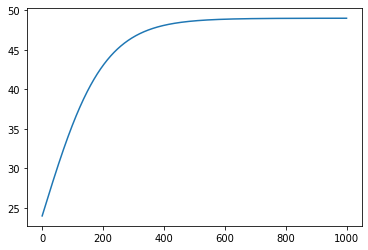

In [4]:
import numpy as np
def calc_coeff(iter_num, high=1.0, low=0.0, alpha=10.0, max_iter=1000.0):
    return np.float(50.0 * (high - low) / (1.0 + np.exp(-alpha*iter_num / max_iter)) - (high - low) + low)

a=[]
for i in range(1000):
    a.append(calc_coeff(i))
a = np.array(a)
import matplotlib.pyplot as plt
plt.plot(a)


In [1]:
'''mv files'''
import os, shutil
img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
toghther_dir = '/root/autoencoder_denoiser/dataset/real_img_referral_for_testing/bitmap_all_together'
clean_dir = os.path.join(img_dir, "bitmap_real_hsqc_clean")
noisy_dir = os.path.join(img_dir, "bitmap_real_hsqc_noisy")
os.makedirs(clean_dir , exist_ok=True)
os.makedirs(noisy_dir , exist_ok=True)

In [6]:
import glob
for f in glob.glob(toghther_dir+'/*'):
    if f.split("_")[-2]=="noisy":
        shutil.move(f ,noisy_dir)
    elif f.split("_")[-2]=="original":
        shutil.move(f ,clean_dir)
    else:
        print(f)

In [2]:
""" I will copy the code above to generate npz file for bitmap hsqc"""
import os, shutil
img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
toghther_dir = '/root/autoencoder_denoiser/dataset/real_img_referral_for_testing/bitmap_all_together'
clean_dir = os.path.join(img_dir, "bitmap_real_hsqc_clean")
noisy_dir = os.path.join(img_dir, "bitmap_real_hsqc_noisy")

import os,sys
from glob import glob
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image



imgs_resized=[]
imgs_orig_size=[]
all_img_paths = (glob(noisy_dir+"/*"))

save_dir_resize = f'/root/autoencoder_denoiser/dataset/resized_real_imgs_bitmap/'
save_dir_orig_size = f'/root/autoencoder_denoiser/dataset/orig_size_real_imgs_bitmap/'
os.makedirs(save_dir_resize, exist_ok=True)
os.makedirs(save_dir_orig_size, exist_ok=True)

last_compound_name = ''
iter = 0
for img_path in tqdm(all_img_paths):
    iter+=1
    noise_level = img_path.split('/')[-1].split('_')[-1]
    noise_level = noise_level[:-4]
    compound_name = img_path.split('/')[-1].split('_')[0]
   

    '''ground truth'''
    path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_noisy","_original")
    path = path[:-5] + '1.png'
    if path[-6].isdigit():
        # print(ground_path)
        path = path[:-6]+path[-5:]
    # print(gound_path)
    img = cv2.imread(path)
    img_truth = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # print("ground truth shape",img_truth.shape)
    img_truth = cv2.resize(img_truth.astype("float32"), (120, 180))
    
    plus_groud = 1-img_truth[:,:, 0]/255 # I will assume this is plus but not sure
    minus_groud = 1-img_truth[:,:, 2]/255
                        # ground_truth = plus_groud - minus_groud
    # norm_image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)

   
    
                                # '''noise'''
                                # img = Image.open(img_path)
                                # img = np.array(img)
                                #                     # plus = 1-img[:,:, 0]/255 # I will assume this is plus but not sure
                                #                     # minus = 1-img[:,:, 2]/255
                                #                     # # print(plus.shape)
                                #                     # noise_input = plus-minus
                                #                     # resized_input = cv2.resize(noise_input.astype("float32"), (120, 180))
                                #                     # # noise_level = img_path.split('/')[-1].split('_')[-1]
                                # # print("noise shape",img.shape)
                                # print(noise_level)
                                # noise_resized = cv2.resize(img.astype("float32"), (120, 180))
                                
                                # # np.savez_compressed(f'{save_dir_resize}/{compound_name}_{noise_level}.npz', noise=resized_input, ground_truth=ground_truth_resized)
                                # # np.savez_compressed(f'{save_dir_orig_size}/{compound_name}_{noise_level}.npz', noise=noise_input, ground_truth=ground_truth)
                                

                                # # imgs_resized.append((resized_input,ground_truth_resized ))
                                # # imgs_orig_size.append((img_result, ground_truth))
                                
    if iter ==7 : break


 10%|█         | 6/60 [00:09<01:24,  1.57s/it]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(180, 120, 3)


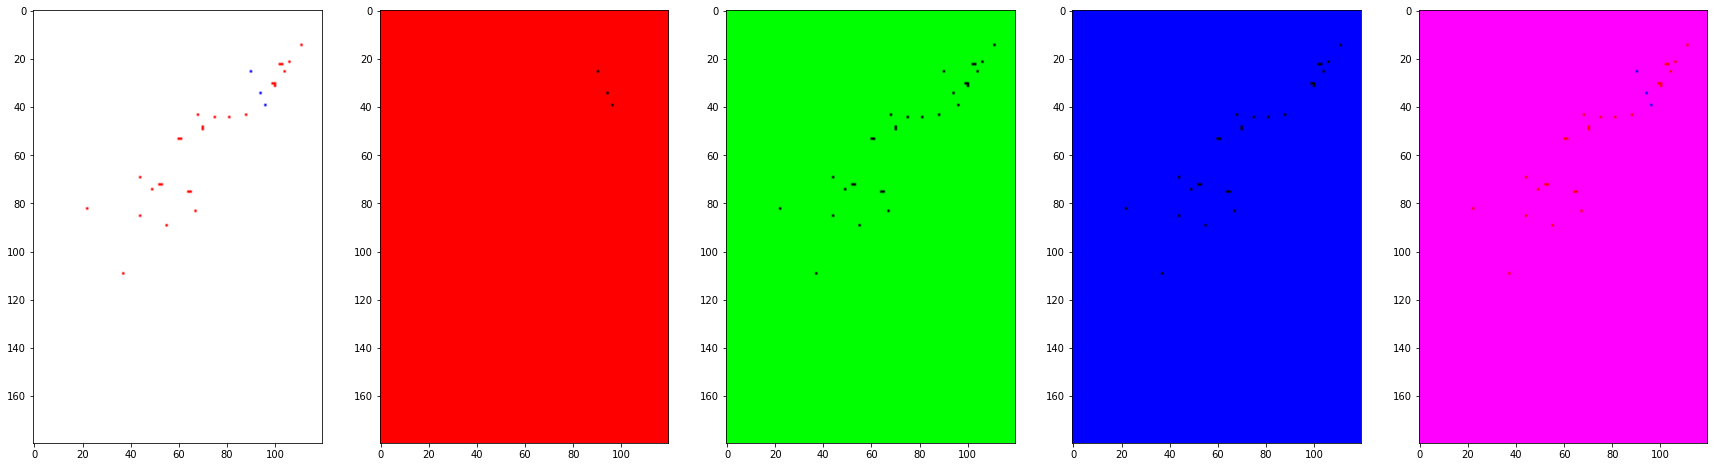

In [11]:
plt.rcParams["figure.figsize"] = (30,90)
print(img_truth.shape)
figure, plots = plt.subplots(ncols=5, nrows=1)
plots[0].imshow(img_truth)

cp1 = np.copy(img_truth)
cp1[:,:,2] = 0
cp1[:,:,1] = 0
plots[1].imshow(cp1)

cp2 = np.copy(img_truth)
cp2[:,:,0] = 0
cp2[:,:,2] = 0
plots[2].imshow(cp2)

cp3 = np.copy(img_truth)
cp3[:,:,0] = 0
cp3[:,:,1] = 0
plots[3].imshow(cp3)

cp4 = np.copy(img_truth)
cp4[:,:,1] = 0
plots[4].imshow(cp4)
# plots[3].imshow(ground_truth_resized[:,:,2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(180, 120, 3)


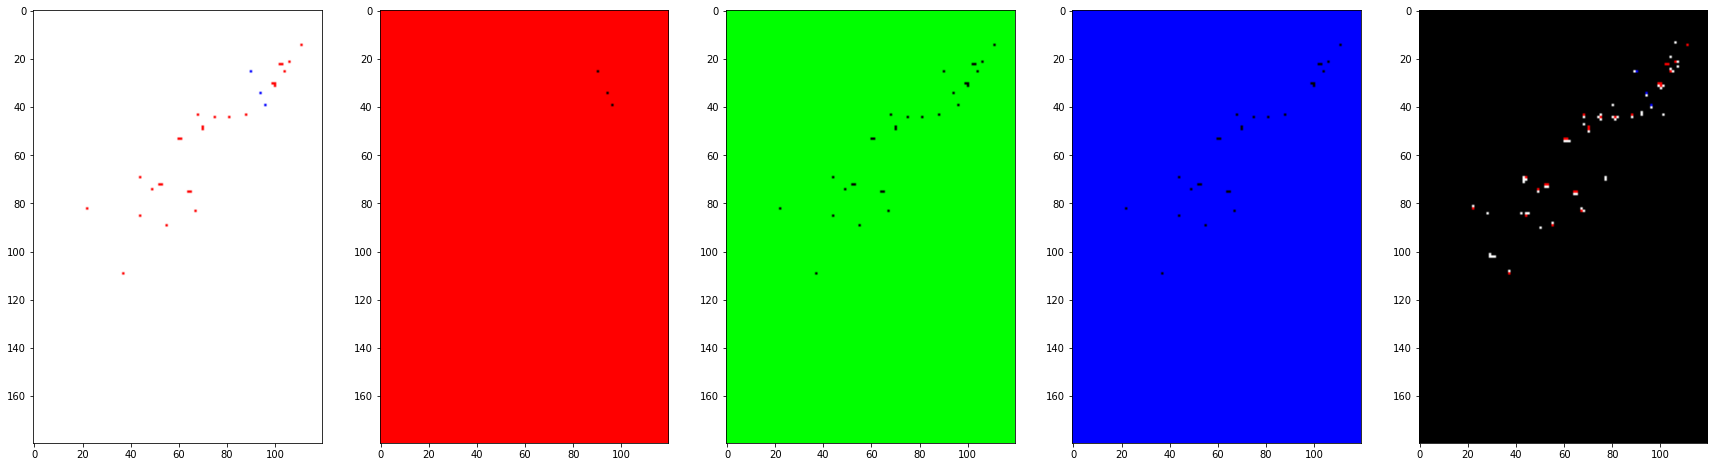

In [21]:
plt.rcParams["figure.figsize"] = (30,90)
print(img_truth.shape)
figure, plots = plt.subplots(ncols=5, nrows=1)
plots[0].imshow(img_truth)

R, G, B = img_truth[:,:,0], img_truth[:,:,1], img_truth[:,:,2]
# d1=np.abs(R-G)<10
# d2=np.abs(B-G)<10
# d3=np.abs(R-B)<10
d1 = R>100
d2= G>100
d3 = B>100
white_pos = np.logical_and(np.logical_and(d1,d2), d3)


cp1 = np.copy(img_truth)
cp1[:,:,2] = 0
cp1[:,:,1] = 0
plots[1].imshow(cp1)

cp2 = np.copy(img_truth)
cp2[:,:,0] = 0
cp2[:,:,2] = 0
plots[2].imshow(cp2)

cp3 = np.copy(img_truth)
cp3[:,:,0] = 0
cp3[:,:,1] = 0
plots[3].imshow(cp3)

cp4 = np.copy(img_truth)
cp4[:,:,0][white_pos]=0
cp4[:,:,1][white_pos]=0
cp4[:,:,2][white_pos]=0

plots[4].imshow(cp4)
# plots[3].imshow(ground_truth_resized[:,:,2])


In [ ]:
red_sig = 255-cp1[0]
green = 255-cp2[1]


(180, 120, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


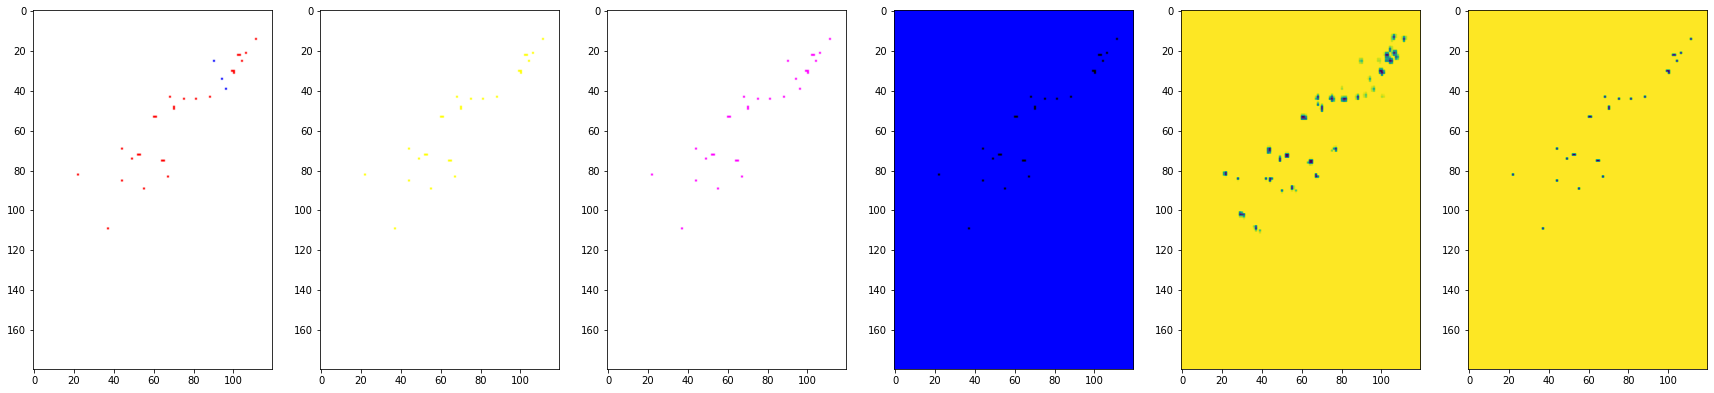

In [44]:
import matplotlib.image
clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)
plt.rcParams["figure.figsize"] = (30,90)
print(img_truth.shape)
figure, plots = plt.subplots(ncols=6, nrows=1)
plots[0].imshow(img_truth)

cp1 = np.copy(img_truth)
blue_pos = np.logical_or( cp1[:,:,0]<255 ,  cp1[:,:,1]<255)
cp1[:,:,0][blue_pos] =255
cp1[:,:,1][blue_pos] =255
# cp1[:,:,2] = 255 # blue should be white
# # cp1[:,:,1] = 255
# cp1[:,:,1][cp1[:,:,1]==255] = 255 
plots[1].imshow(cp1)

cp2 = np.copy(img_truth)
cp2[:,:,0] = 255
cp2[:,:,2] = 255
plots[2].imshow(cp2)

cp3 = np.copy(img_truth)
cp3[:,:,0] = 0
cp3[:,:,1] = 0
plots[3].imshow(cp3)

avg3= (0.2989*cp3[:,:,0]+0.5870 *cp3[:,:,1]+0.1140 * cp3[:,:,2])

plots[4].imshow(avg3)

cp3[:,:,2][cp3[:,:,2]>0] = 255
plots[5].imshow(cp3[:,:,2])
# plots[3].imshow(ground_truth_resized[:,:,2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(180, 120, 3)


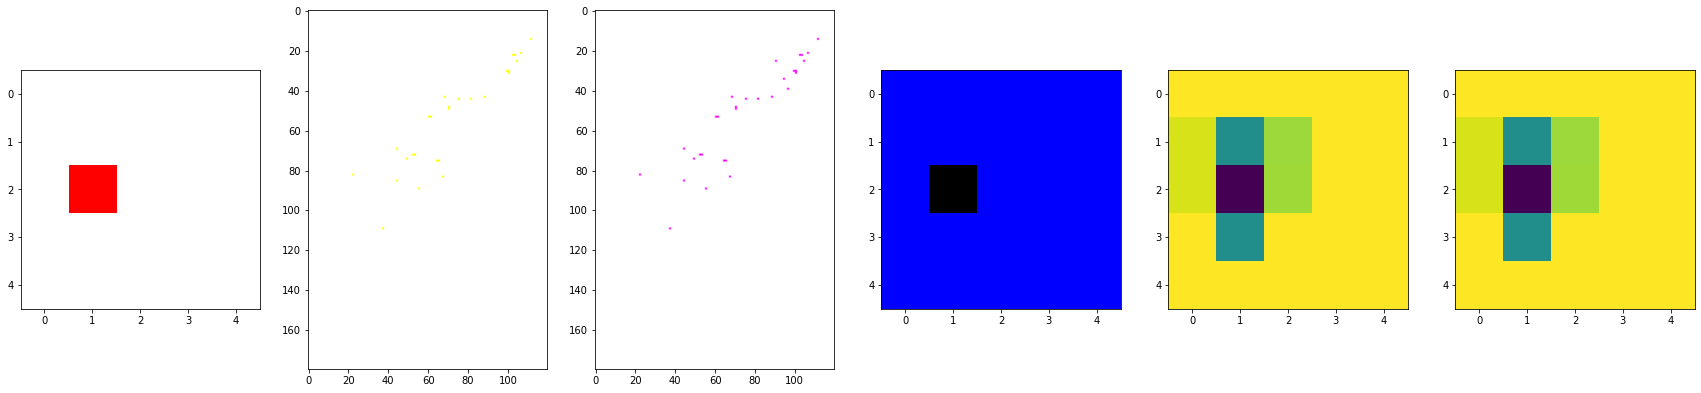

In [45]:
import matplotlib.image
clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)
plt.rcParams["figure.figsize"] = (30,90)
print(img_truth.shape)
figure, plots = plt.subplots(ncols=6, nrows=1)
plots[0].imshow(img_truth[12:17,110:115,:])

cp1 = np.copy(img_truth)
blue_pos = np.logical_or( cp1[:,:,0]<255 ,  cp1[:,:,1]<255)
cp1[:,:,0][blue_pos] =255
cp1[:,:,1][blue_pos] =255
# cp1[:,:,2] = 255 # blue should be white
# # cp1[:,:,1] = 255
# cp1[:,:,1][cp1[:,:,1]==255] = 255 
plots[1].imshow(cp1)

cp2 = np.copy(img_truth)
cp2[:,:,0] = 255
cp2[:,:,2] = 255
plots[2].imshow(cp2)

cp3 = np.copy(img_truth)
cp3[:,:,0] = 0
cp3[:,:,1] = 0
plots[3].imshow(cp3[12:17,110:115,:])

avg3= (0.2989*cp3[:,:,0]+0.5870 *cp3[:,:,1]+0.1140 * cp3[:,:,2])

plots[4].imshow(avg3[12:17,110:115])


plots[5].imshow(cp3[12:17,110:115,2])
# plots[3].imshow(ground_truth_resized[:,:,2])


In [46]:
img_truth[12:17,110:115,:]

array([[[255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ]],

       [[252.26666 , 239.23334 , 239.23334 ],
        [198.      , 126.5     , 126.5     ],
        [255.      , 218.      , 218.      ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ]],

       [[252.26666 , 239.31482 , 239.31482 ],
        [142.      ,   0.      ,   0.      ],
        [255.      , 218.22223 , 218.22223 ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ]],

       [[255.      , 255.      , 255.      ],
        [197.44444 , 125.611115, 125.611115],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ],
        [255.      , 255.      , 255.      ]],

       [[255.      , 255.      , 255.      ],
        [255.      , 255. 

In [40]:
print(cp3[12:17,110:115,:])
(cp3[12:17,110:115,2])

[[[  0.         0.       255.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]]

 [[  0.         0.       239.23334 ]
  [  0.         0.       126.5     ]
  [  0.         0.       218.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]]

 [[  0.         0.       239.31482 ]
  [  0.         0.         0.      ]
  [  0.         0.       218.22223 ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]]

 [[  0.         0.       255.      ]
  [  0.         0.       125.611115]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]]

 [[  0.         0.       255.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]
  [  0.         0.       255.      ]]]


array([[255.      , 255.      , 255.      , 255.      , 255.      ],
       [239.23334 , 126.5     , 218.      , 255.      , 255.      ],
       [239.31482 ,   0.      , 218.22223 , 255.      , 255.      ],
       [255.      , 125.611115, 255.      , 255.      , 255.      ],
       [255.      , 255.      , 255.      , 255.      , 255.      ]],
      dtype=float32)

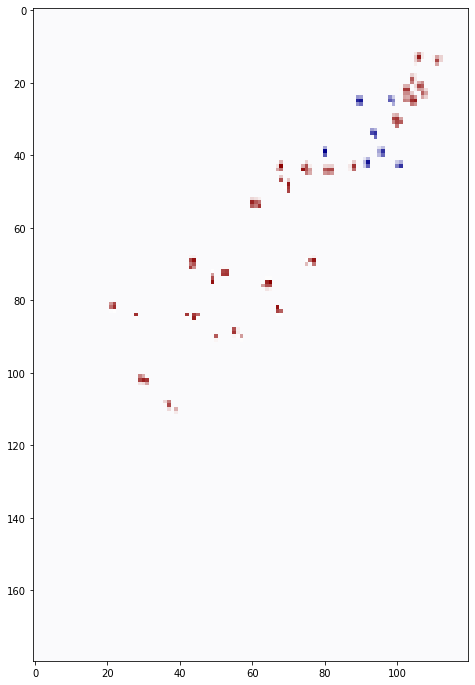

In [25]:
plt.rcParams["figure.figsize"] = (20, 12)
plt.imshow(-plus_groud+minus_groud, cmap=custom_HSQC_cmap)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(180, 120, 3)


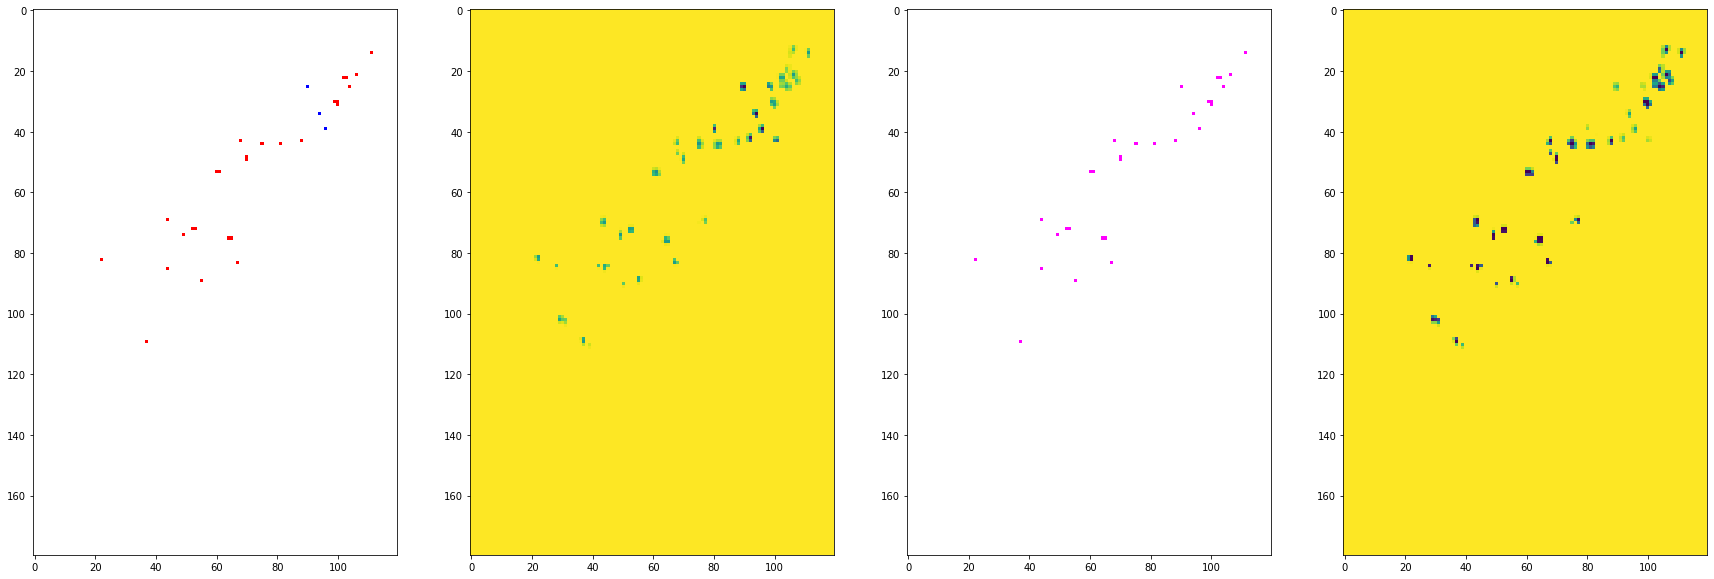

In [65]:
plt.rcParams["figure.figsize"] = (30,90)
print(noise_resized.shape)
figure, plots = plt.subplots(ncols=4, nrows=1)
plots[0].imshow(img_truth)

cp1 = np.copy(img_truth)
cp1[:,:,2] = 255
cp1[:,:,1] = 255
plots[1].imshow(cp1[:,:,0])

cp2 = np.copy(img_truth)
cp2[:,:,0] = 255
cp2[:,:,2] = 255
plots[2].imshow(cp2)

cp3 = np.copy(img_truth)
cp3[:,:,0] = 255
cp3[:,:,1] = 255
plots[3].imshow(cp3[:,:,2])

# plots[3].imshow(ground_truth_resized[:,:,2])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


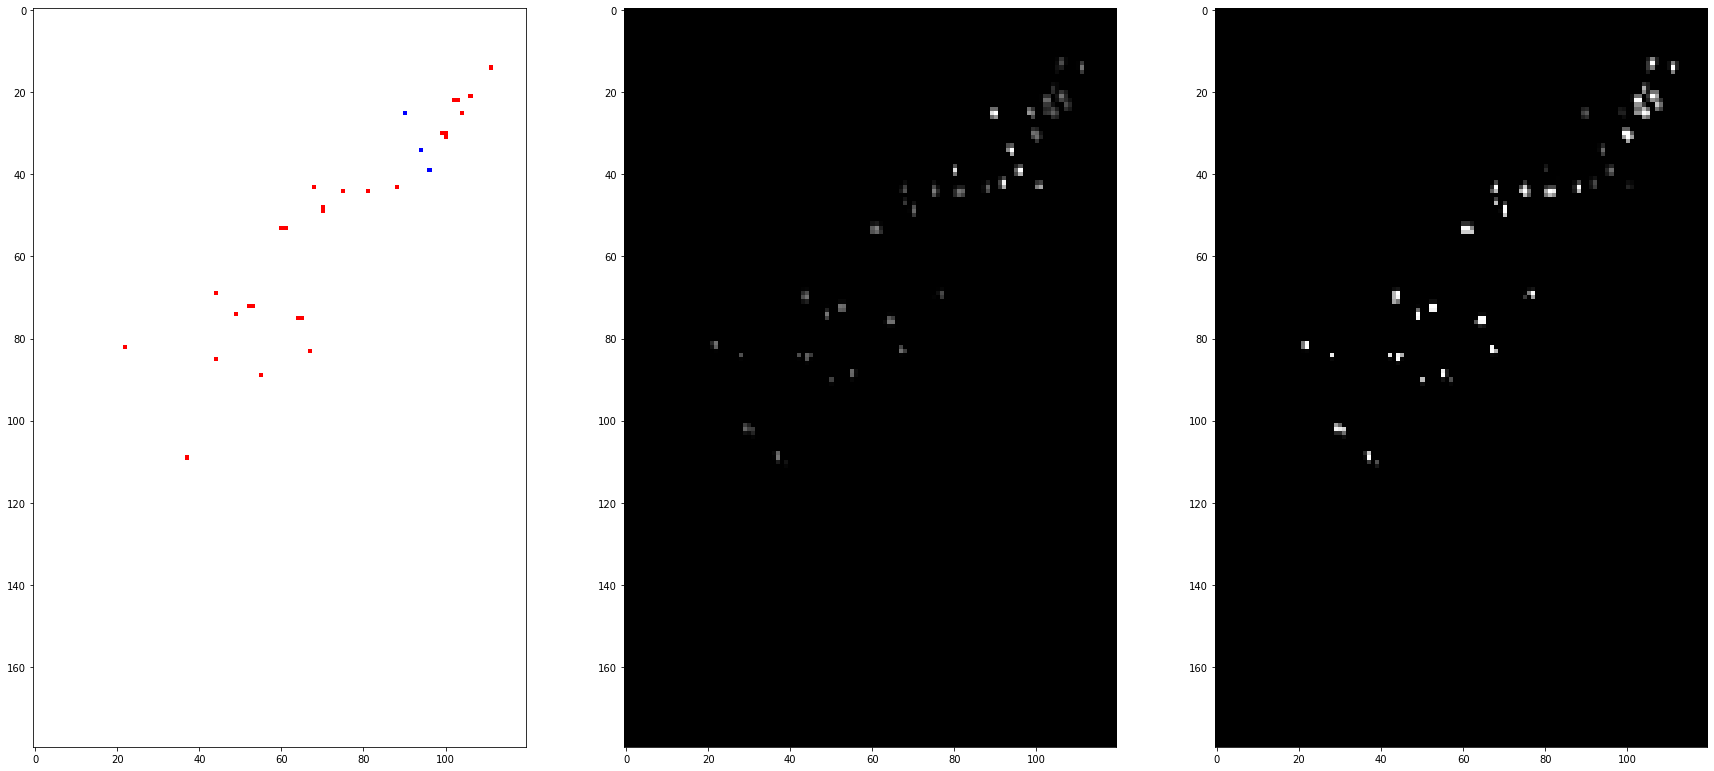

In [62]:
figure, plots = plt.subplots(ncols=3, nrows=1)
plots[0].imshow(img_truth)

plots[1].imshow(plus_groud,cmap='gray')

plots[2].imshow(minus_groud,cmap='gray')


In [54]:
# print( np.where(cp1!=255))
cp1[cp1<255]

array([250.50371 , 204.22223 , 248.66667 , 244.8     , 177.79999 ,
       249.      , 252.26666 , 198.      , 238.73334 , 226.88889 ,
       252.26666 , 142.      , 243.8     , 197.44444 , 243.12222 ,
       248.93333 , 206.96666 , 248.86667 , 212.6037  , 246.5889  ,
       203.92223 , 229.72223 , 252.75185 , 204.96297 , 206.14444 ,
       233.66667 , 141.6     , 216.44444 , 252.2     , 150.33333 ,
       151.8     , 240.8     , 190.2     , 212.5     , 238.93333 ,
       199.55556 , 201.02223 , 238.25555 , 177.33333 , 215.33333 ,
       148.11111 , 148.11111 , 148.11111 , 204.88889 , 219.55556 ,
       215.27777 , 187.07777 , 227.34444 , 210.48149 , 230.12222 ,
        32.01111 ,   0.      , 106.166664, 134.46666 , 205.66667 ,
       199.66667 , 159.83333 , 194.2     , 149.36667 , 104.72222 ,
       184.02222 , 209.88889 , 223.02592 , 211.44444 , 222.72223 ,
       144.      , 154.61111 , 233.61111 , 186.86667 , 143.5     ,
       220.03334 , 201.22223 , 180.90741 , 165.38889 , 116.688

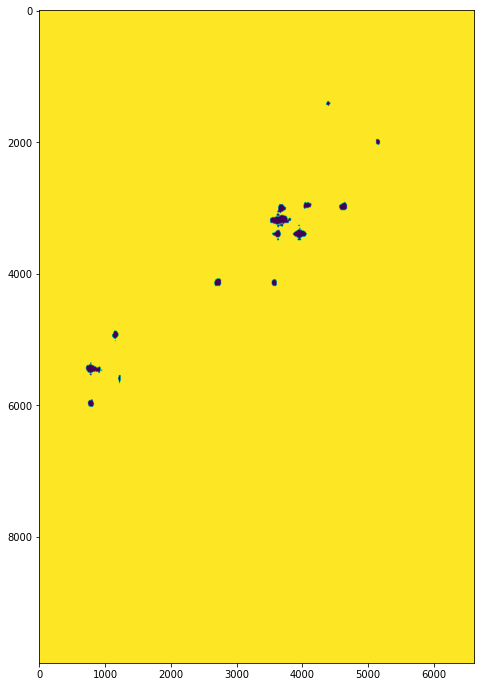

In [24]:
plt.imshow(img_truth[:,:,1])

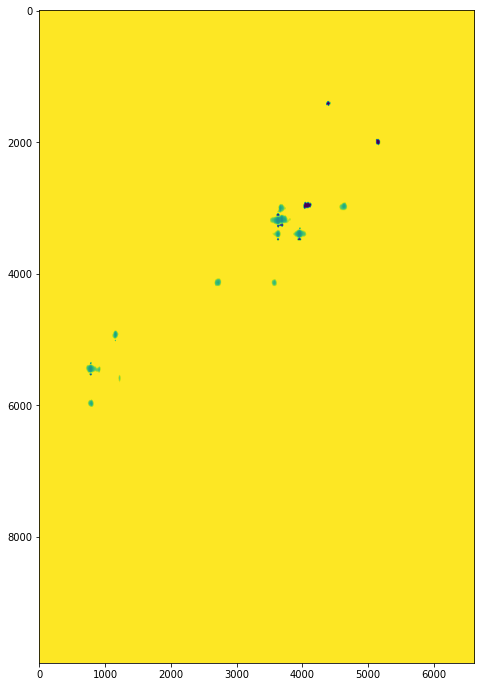

In [26]:
plt.imshow(img_truth[:,:,2])

In [1]:
""" I will copy the code above to generate npz file for bitmap hsqc"""

"""I think i understand it now, let me do it again """
import os, shutil
img_dir = "/root/autoencoder_denoiser/dataset/real_img_referral_for_testing"
toghther_dir = '/root/autoencoder_denoiser/dataset/real_img_referral_for_testing/bitmap_all_together'
clean_dir = os.path.join(img_dir, "bitmap_real_hsqc_clean")
noisy_dir = os.path.join(img_dir, "bitmap_real_hsqc_noisy")

import os,sys
from glob import glob
import cv2
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image

import matplotlib.image
clist = [(0,"darkblue"), (0.5,"white"), (1, "darkred")]
custom_HSQC_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("_",clist)

plt.rcParams["figure.figsize"] = (40,90)

imgs_resized=[]
imgs_orig_size=[]
all_img_paths = (glob(noisy_dir+"/*"))

save_dir_resize = f'/root/autoencoder_denoiser/dataset/resized_real_imgs_bitmap/'
save_dir_orig_size = f'/root/autoencoder_denoiser/dataset/orig_size_real_imgs_bitmap/'
os.makedirs(save_dir_resize, exist_ok=True)
os.makedirs(save_dir_orig_size, exist_ok=True)

last_compound_name = ''
iter = 0

def convert_to_intensities(custom_HSQC_cmap, path):
    img = cv2.imread(path)
    img_truth = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype("float32")
    # print("ground truth shape",img_truth.shape)
    # img_truth = cv2.resize(img_truth.astype("float32"), (240, 360))
    R, G, B = img_truth[:,:,0], img_truth[:,:,1], img_truth[:,:,2]
    shape = img_truth.shape[0:2]
    plus = R
    minus = B
            # plus = np.zeros(shape)
            # minus = np.zeros(shape)
            # plus_pos = B <= 0#np.logical_and( R-B>100 , B <100 ) 
            # plus[plus_pos]=R[plus_pos]
            # minus_pos = R <= 0 # np.logical_and( B-R>100 , R <100 ) 
            # minus[minus_pos] = B[minus_pos]
    
    plus_groud = plus/255 # I will assume this is plus but not sure
    minus_groud = minus/255
    ground_truth = plus_groud - minus_groud
    # norm_image = cv2.normalize(image, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
    # figure, plots = plt.subplots(ncols=2, nrows=1)
    # plots[0].imshow(ground_truth_resized.astype(int))

    # plots[1].imshow(ground_truth, cmap=custom_HSQC_cmap, vmax=1, vmin=-1)
    return ground_truth

for img_path in tqdm(all_img_paths):
    # print(img_path)
    iter+=1
    noise_level = img_path.split('/')[-1].split('_')[-1]
    noise_level = noise_level[:-4]
    compound_name = img_path.split('/')[-1].split('_')[0]
   

    '''ground truth'''
    ground_path = img_path.replace("real_hsqc_noisy","real_hsqc_clean").replace("_noisy","_original")

    ground_path = ground_path[:-5] + '1.png'
    if ground_path[-6].isdigit():
        # print(ground_path)
        ground_path = ground_path[:-6]+ground_path[-5:]
    # print(gound_path)
    ground_truth = convert_to_intensities(custom_HSQC_cmap, ground_path)
    resized_truth = cv2.resize(ground_truth, (240, 360))
   
    """noise"""
    noise_input = convert_to_intensities(custom_HSQC_cmap, img_path)
    resized_noise = cv2.resize(noise_input, (240, 360))
                            
    noise_level = img_path.split('/')[-1].split('_')[-1]
                                # # print("noise shape",img.shape)
                                # print(noise_level)
                                
                                
    name = img_path.split("/")[-1].split(".")[0]
    name = [ord(c) for c in name]

    np.savez_compressed(f'{save_dir_resize}/{compound_name}_{noise_level}.npz', noise=resized_noise, ground_truth=resized_truth, name = name )
    np.savez_compressed(f'{save_dir_orig_size}/{compound_name}_{noise_level}.npz', noise=noise_input, ground_truth=ground_truth, name = name)
    

    # # imgs_resized.append((resized_input,ground_truth_resized ))
    # # imgs_orig_size.append((img_result, ground_truth))
                           
    # if iter ==10 : break


100%|██████████| 59/59 [08:00<00:00,  8.15s/it]


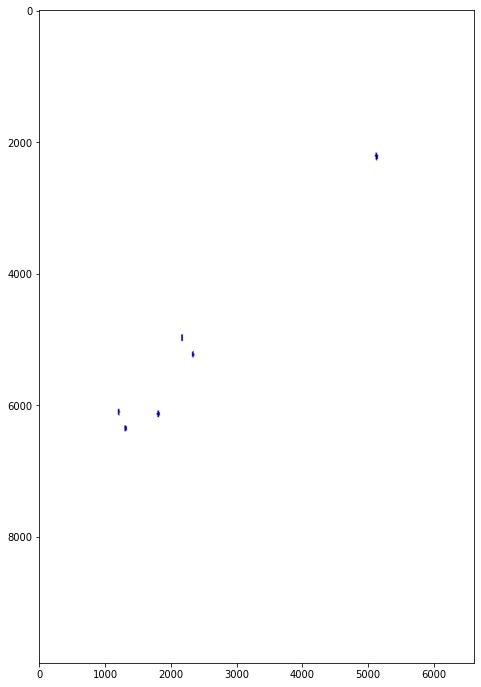

In [16]:
plt.rcParams["figure.figsize"] = (30,12)

plt.imshow(img_truth)

In [19]:
np.where(img_truth!=255)

(array([ 89,  89,  89,  90,  90,  90,  94,  94,  94,  95,  95,  95, 110,
        110, 110, 111, 111, 111, 114, 114, 114, 115, 115, 115]),
 array([39, 39, 39, 39, 39, 39, 42, 42, 42, 42, 42, 42, 32, 32, 32, 32, 32,
        32, 23, 23, 23, 23, 23, 23]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2]))

In [20]:
np.where(img_truth!=255)

(array([2155, 2155, 2155, ..., 6404, 6404, 6404]),
 array([5102, 5102, 5102, ..., 1326, 1326, 1326]),
 array([0, 1, 2, ..., 0, 1, 2]))

In [3]:
w = np.where(resized_input!=255)
print(resized_input[w[0:2]])
len(w[0])

[[255.        17.        17.      ]
 [255.        17.        17.      ]
 [104.666664 104.666664 255.      ]
 ...
 [250.05556   35.        35.      ]
 [250.05556   35.        35.      ]
 [250.05556   35.        35.      ]]


2471

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


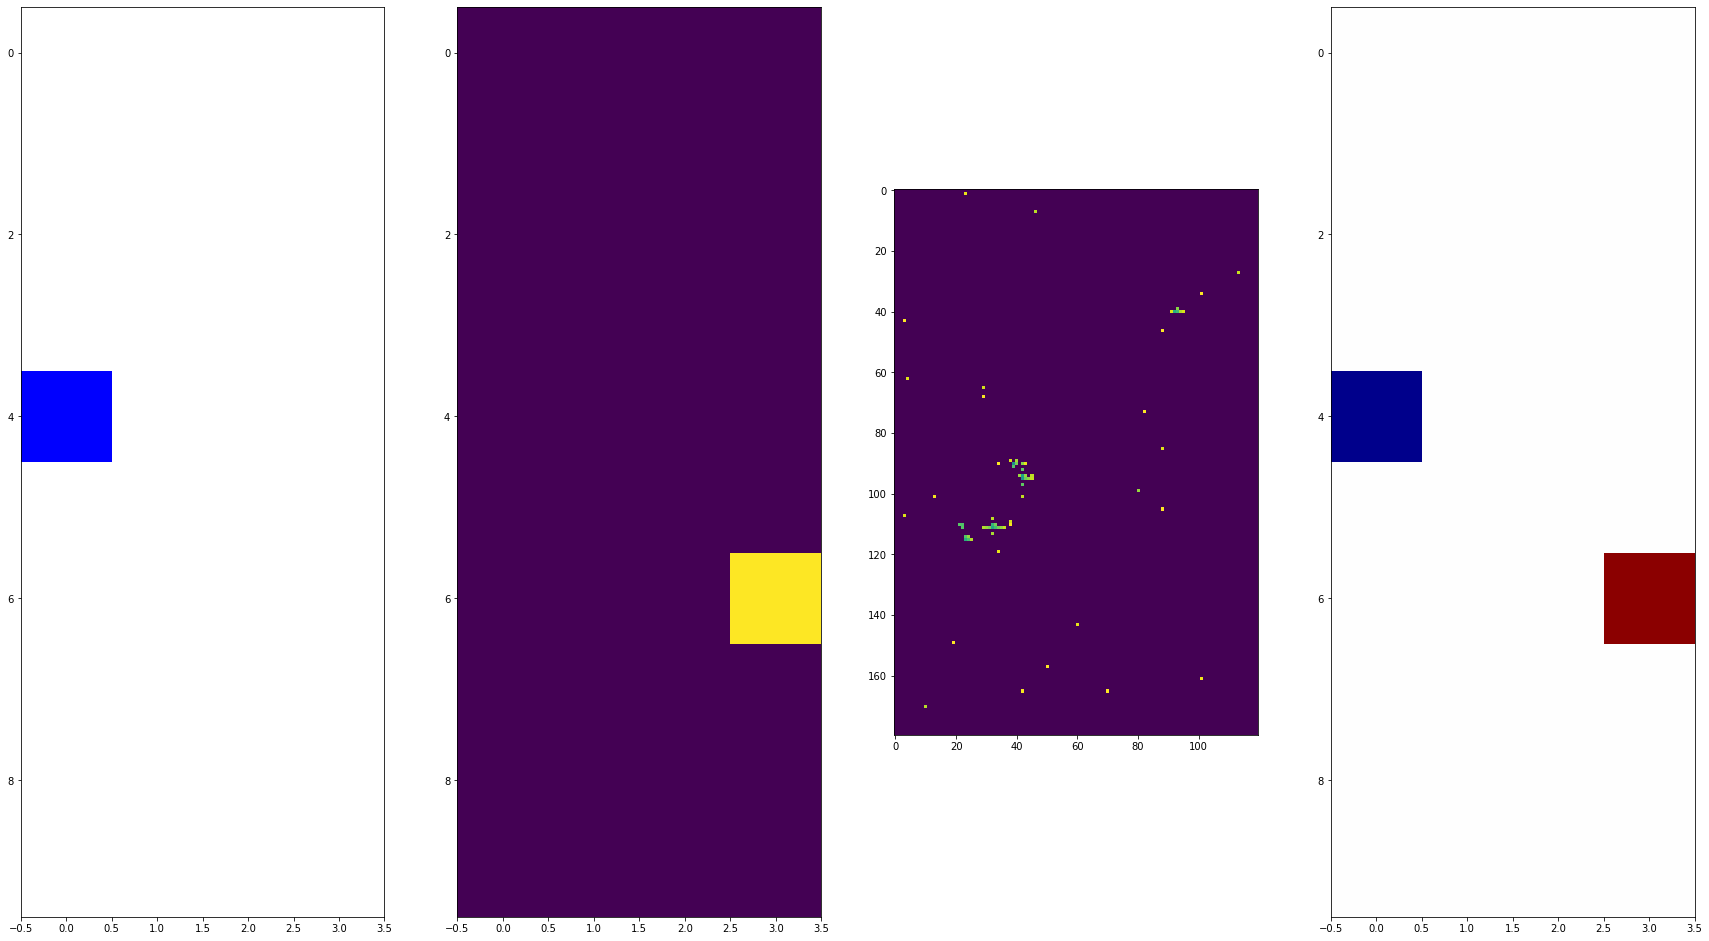

In [4]:

figure, plots = plt.subplots(ncols=4, nrows=1)
plots[0].imshow(resized_input[145:155, 19:23,:])
plots[1].imshow(plus[145:155, 19:23])


plots[2].imshow(minus)

plots[3].imshow(input[145:155, 19:23], cmap=custom_HSQC_cmap)


# plots[3].imshow(ground_truth_resized[:,:,2])


In [5]:
resized_input[145:155, 19:23,:]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[  0.,   0., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255.,   1.,   1.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


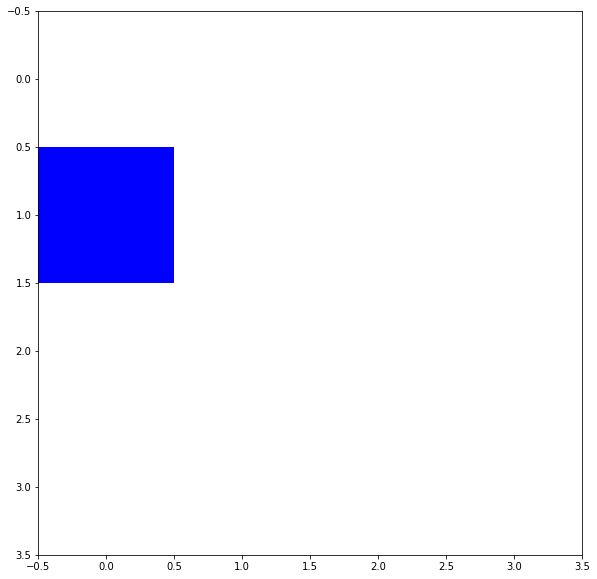

In [24]:
plus[plus>0]

array([209.3999939 , 199.92222595, 188.06666565, 201.        ,
       201.47776794, 235.71110535, 206.80000305, 196.        ,
       185.        ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(180, 120, 3)


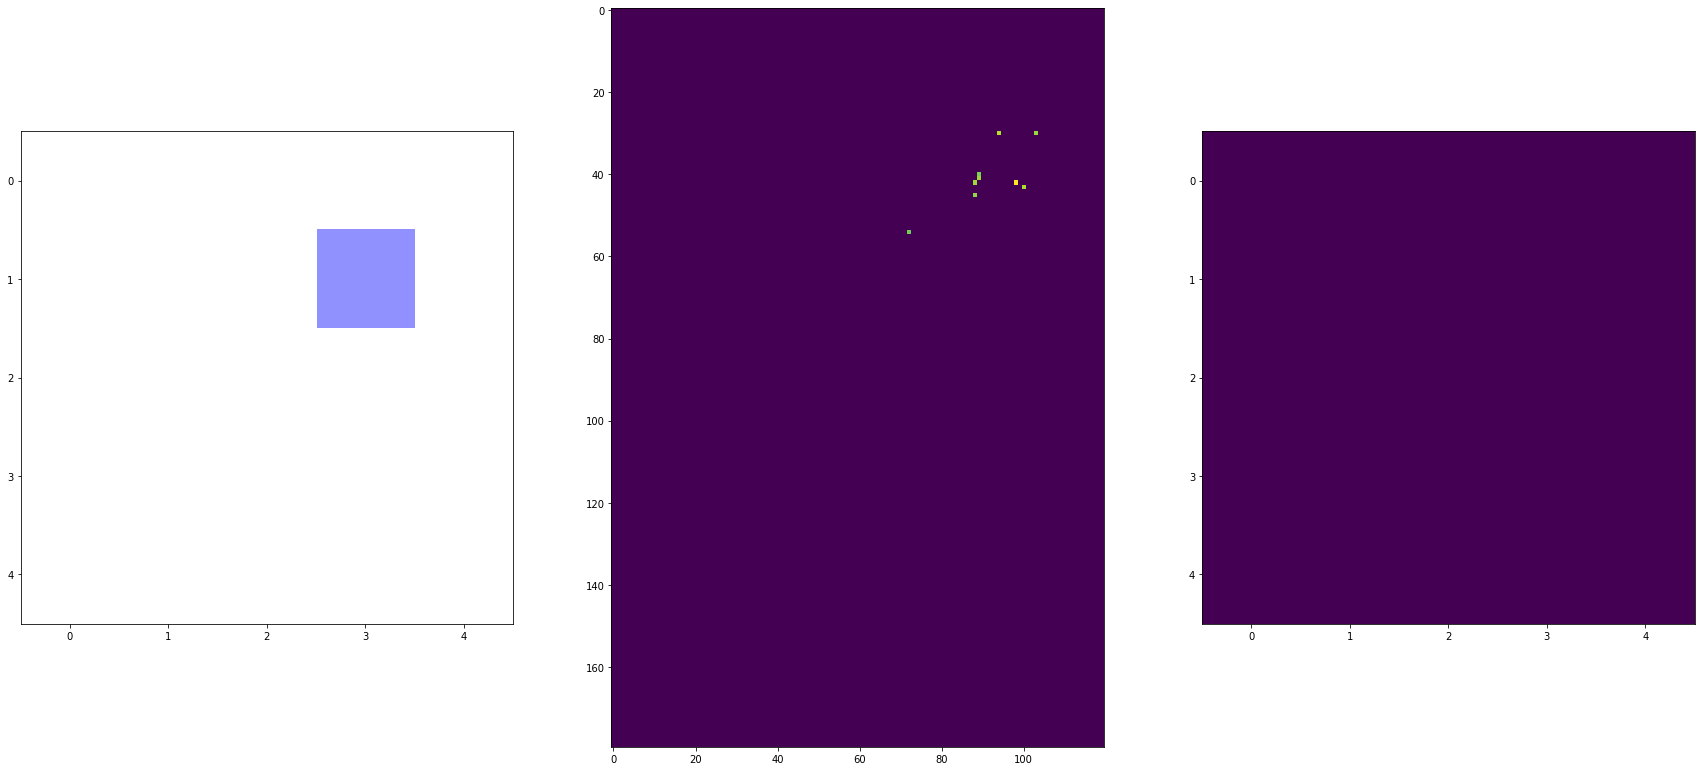

In [20]:
plt.rcParams["figure.figsize"] = (30,90)
print(img_truth.shape)    
figure, plots = plt.subplots(ncols=3, nrows=1)
plots[0].imshow(img_truth[35:40,70:75,:])

R, G, B = img_truth[:,:,0], img_truth[:,:,1], img_truth[:,:,2]



plots[1].imshow(plus)


plots[2].imshow(minus[35:40,70:75])


# plots[3].imshow(ground_truth_resized[:,:,2])


In [21]:
img_truth[35:40,70:75,:]

array([[[255.        , 255.        , 255.        ],
        [255.        , 255.        , 255.        ],
        [255.        , 255.        , 255.        ],
        [181.6       , 181.6       , 233.74445   ],
        [255.        , 255.        , 255.        ]],

       [[255.        , 255.        , 255.        ],
        [131.06667   , 131.06667   , 213.86667   ],
        [255.        , 255.        , 255.        ],
        [  0.56666666,   0.56666666, 233.66667   ],
        [255.        , 255.        , 255.        ]],

       [[255.        , 255.        , 255.        ],
        [162.25555   , 162.25555   , 255.        ],
        [255.        , 255.        , 255.        ],
        [255.        , 255.        , 255.        ],
        [255.        , 255.        , 255.        ]],

       [[255.        , 255.        , 255.        ],
        [255.        , 255.        , 255.        ],
        [255.        , 255.        , 255.        ],
        [255.        , 255.        , 255.        ],
      

In [64]:
img_truth[w[0:2]]

array([[  0.     ,   0.     , 165.34444],
       [  0.     ,   0.     , 165.34444],
       [  0.     ,   0.     , 181.83333],
       [  0.     ,   0.     , 181.83333],
       [  0.     ,   0.     , 161.73334],
       [  0.     ,   0.     , 161.73334],
       [  0.     ,   0.     , 146.16666],
       [  0.     ,   0.     , 146.16666],
       [  0.     ,   0.     , 173.8    ],
       [  0.     ,   0.     , 173.8    ],
       [  0.     ,   0.     , 191.46666],
       [  0.     ,   0.     , 191.46666],
       [  0.     ,   0.     , 181.2889 ],
       [  0.     ,   0.     , 181.2889 ],
       [  0.     ,   0.     , 168.95184],
       [  0.     ,   0.     , 168.95184],
       [  0.     ,   0.     , 173.94444],
       [  0.     ,   0.     , 173.94444],
       [  0.     ,   0.     , 156.     ],
       [  0.     ,   0.     , 156.     ],
       [  0.     ,   0.     , 181.06667],
       [  0.     ,   0.     , 181.06667],
       [  0.     ,   0.     , 161.13333],
       [  0.     ,   0.     , 161.

(array([15, 15, 16, 16, 21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24,
        24, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26,
        27, 27, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29,
        29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 34, 34,
        34, 34, 35, 35, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 42,
        42, 43, 43, 45, 45, 49, 49, 52, 52, 54, 54, 59, 59, 59, 59, 61, 61,
        61, 61, 62, 62, 62, 62]),
 array([105, 105, 105, 105,  98,  98, 107, 107,  94,  94,  99,  99, 103,
        103, 105, 105, 102, 102, 103, 103, 104, 104, 105, 105, 102, 102,
        105, 105, 103, 103, 104, 104, 105, 105, 105, 105, 102, 102, 103,
        103, 104, 104,  96,  96,  97,  97,  98,  98,  99,  99, 102, 102,
        103, 103, 104, 104,  94,  94,  96,  96,  97,  97, 103, 103, 103,
        103,  79,  79,  87,  87,  79,  79,  83,  83,  68,  68,  68,  68,
         89,  89,  89,  89,  88,  88,  98,  98, 100, 100,  88,  88,  49,